# Bike Case Study


#### Problem Statement :- This assignment is a programming assignment wherein you have to build a multiple linear regression model for the prediction of demand for shared bikes. 

#### Business Goal: Model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
#IMPORT LIBRARIES
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm

In [3]:
#LOADING THE DATA
rental = pd.read_csv('day.csv')
rental.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Sanity Checks

In [4]:
#checking the datashape
rental.shape

(730, 16)

In [5]:
##inspecting the data for null values
rental.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
#checking the datatype for each columns
rental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
### All the datatypes of the column look perfect except dteday. Lets convert it into datetime object

rental['dteday'] = pd.to_datetime(rental['dteday']) #can be used for our visualization

In [8]:
### dropping columns as they do not provide any values 

rental.drop(columns=['instant'],inplace=True)


In [9]:
###lets take a look into the first 5 rows
rental.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2018-01-01,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2018-02-01,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,2018-03-01,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,2018-04-01,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,2018-05-01,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [10]:
#they are certain column name with incorrect spelling. 
rental.rename(columns={'yr':'year','mnth':'month','cnt':'count','hum':'humidity'},inplace=True)

# <font color = blue> Data Preparation </font>

### According the database dictionary, there are certain columns that are provided as numerical type but are actually categorical type.
##### These columns are: 
##### `1.Season`
##### `2.year`
##### `3.weathersit`

## Changing these columns back to categorical type

In [11]:
season_map = {1:'spring', 2:'summer', 3:'fall', 4:'winter'}
rental['season'] = rental['season'].map(season_map)

In [12]:
day = {1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday',0:'Sunday'}
rental['weekday'] = rental['weekday'].map(day)

In [13]:
weather = {1: 'Clear', 2: 'Cloudy', 3: 'Light_Rain', 4: 'Heavy_Rain'}

rental.weathersit = rental.weathersit.map(weather)

In [14]:
rental.head(10)

,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,2018-01-01,spring,0,1,0,Monday,1,Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2018-02-01,spring,0,1,0,Tuesday,1,Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,2018-03-01,spring,0,1,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,2018-04-01,spring,0,1,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,2018-05-01,spring,0,1,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,2018-06-01,spring,0,1,0,Saturday,0,Clear,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,2018-07-01,spring,0,1,0,Sunday,0,Cloudy,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,2018-08-01,spring,0,1,0,Monday,1,Cloudy,6.765000,8.11270,53.5833,17.875868,68,891,959
8,2018-09-01,spring,0,1,0,Tuesday,1,Clear,5.671653,5.80875,43.4167,24.250650,54,768,822
9,2018-10-01,spring,0,1,0,Wednesday,1,Clear,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [15]:
#this could be useful for our visulization
yr = {0:2018,1:2019}
rental.year = rental.year.map(yr)

In [16]:
month = {1:'January',2:"February",3:"March",4:"April",5:"May",6:"June",7:"July",8:"August",9:"September",10:"October",11:'November',12:"December"}
rental.month = rental.month.map(month)

In [17]:
rental.head()

,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,2018-01-01,spring,2018,January,0,Monday,1,Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2018-02-01,spring,2018,January,0,Tuesday,1,Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,2018-03-01,spring,2018,January,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,2018-04-01,spring,2018,January,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,2018-05-01,spring,2018,January,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### So I have arranged the data into various categorical columns for further visuallization of data

# Data Visualization

# Univariate Analysis

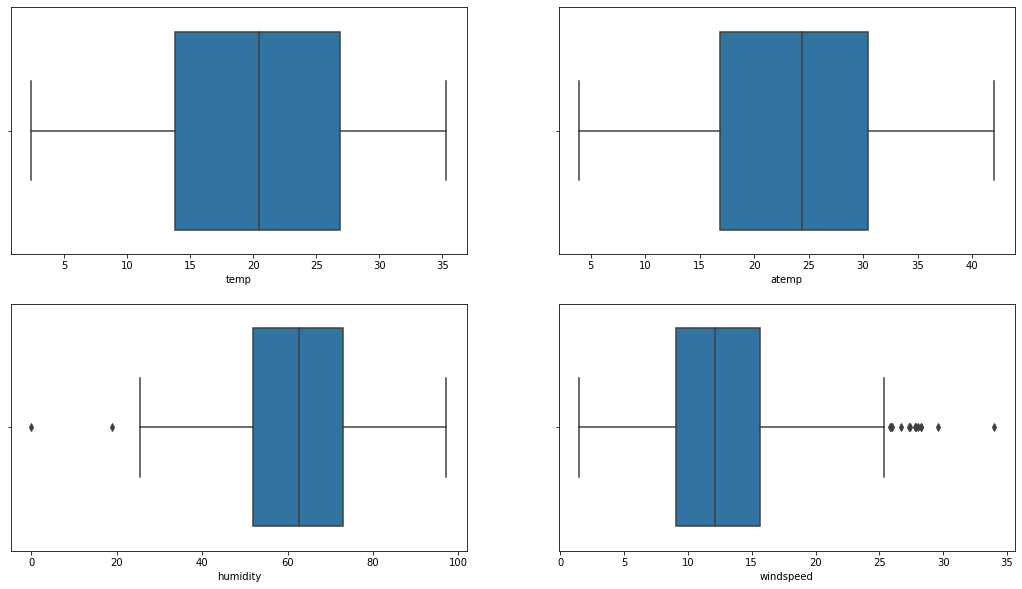

In [18]:
#univaraite analysis on numerical columns
plt.figure(figsize=(18,10))
plt.subplot(2,2,1)
sns.boxplot(rental['temp'])
plt.subplot(2,2,2)
sns.boxplot(rental['atemp'])
plt.subplot(2,2,3)
sns.boxplot(rental['humidity'])
plt.subplot(2,2,4)
sns.boxplot(rental['windspeed'])
plt.show()

### Inferences:
1. The median of temperature and adjusted temperature is 21 and 24 degree
2. The median of humidity is close to 60
3. The median of windspeed is around 13 

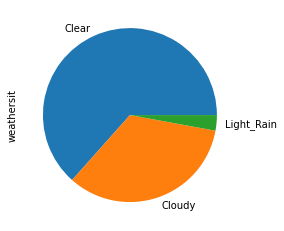

In [19]:
#finding the most occuring weather situation within the time period
rental.weathersit.value_counts().plot.pie()
plt.show()

### Inferences:- 
Clear skies have most occured with the 2 year period whereas heavy rain occurence are zero.

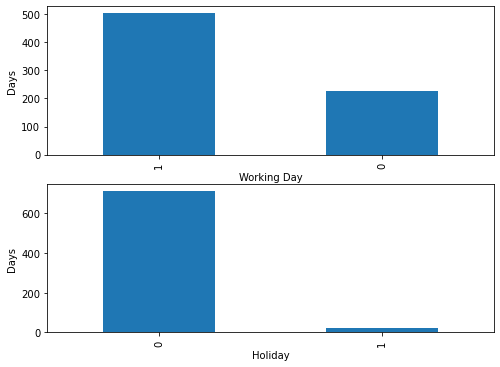

In [20]:
#checking the number of working day and holidays
plt.figure(figsize=(8,6))
plt.subplot(2,1,1)
rental.workingday.value_counts().plot.bar()
plt.xlabel('Working Day')
plt.ylabel('Days')


plt.subplot(2,1,2)
rental.holiday.value_counts().plot.bar()
plt.xlabel('Holiday')
plt.ylabel('Days')

plt.show()

### Inferences:
1. Working day is about 500 days and non-holidays are nearly 800 days in the data set

## Bivariate Analysis

In [22]:
rental.head()

,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,2018-01-01,spring,2018,January,0,Monday,1,Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2018-02-01,spring,2018,January,0,Tuesday,1,Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,2018-03-01,spring,2018,January,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,2018-04-01,spring,2018,January,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,2018-05-01,spring,2018,January,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


<AxesSubplot:xlabel='holiday', ylabel='count'>

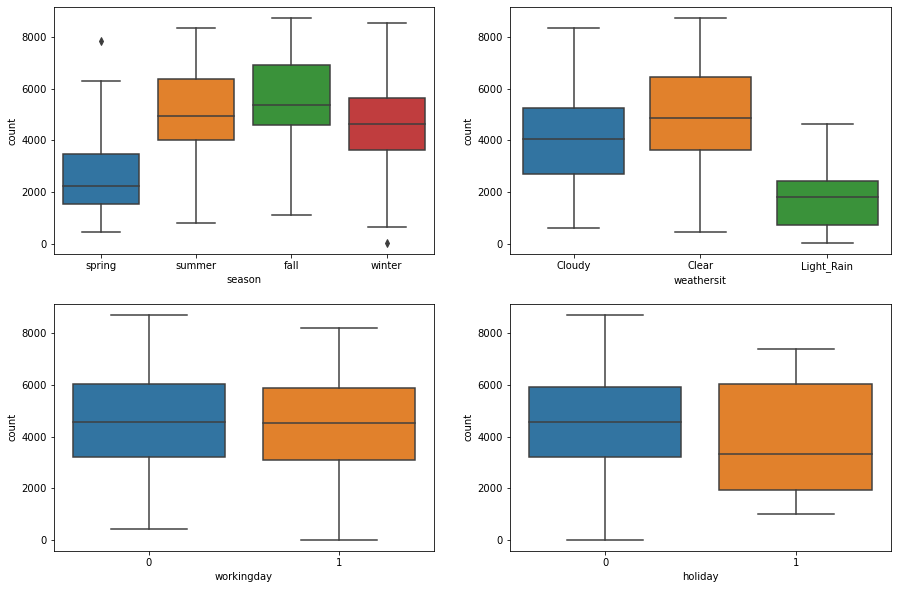

In [23]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.boxplot(x='season',y='count',data=rental)
plt.subplot(2,2,2)
sns.boxplot(x='weathersit',y='count',data=rental)
plt.subplot(2,2,3)
sns.boxplot(x='workingday',y='count',data=rental)
plt.subplot(2,2,4)
sns.boxplot(x='holiday',y='count',data=rental)

## Inferences

1. The inter quartile range for summers and winters are more or less the same
2. Clear weather situation has permitted the use of bicyles than any other season
3. Customers renting the bicycle on non-working day is more than on renting on working days
4. The median of the count of customers rentin on non-holiday is more than holiday


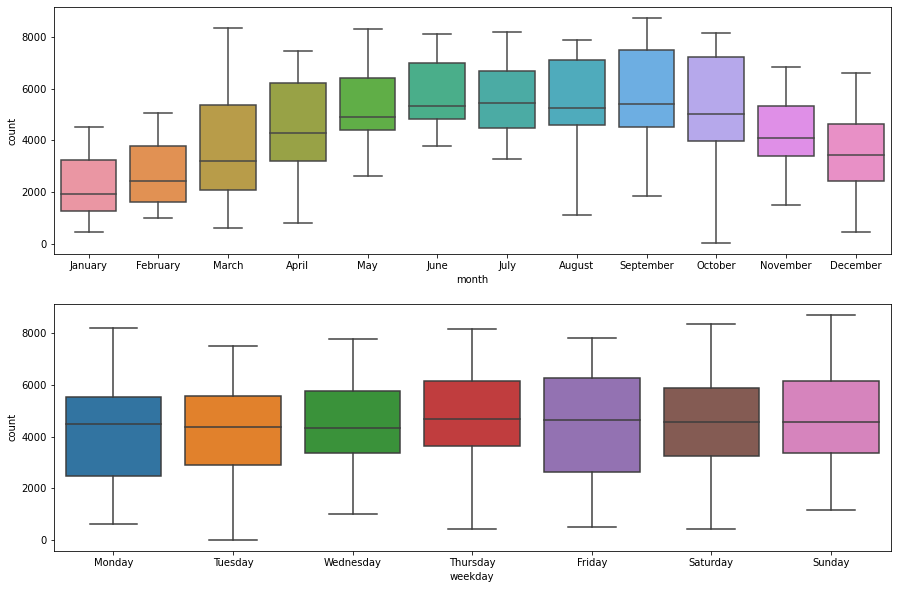

In [24]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
sns.boxplot(x='month',y='count',data=rental)

plt.subplot(2,1,2)
sns.boxplot(x='weekday',y='count',data=rental)
plt.show()

### Inferences:
1. The interquartile range for the month of October is the highest
2. The median of count remains the same on all the days of week

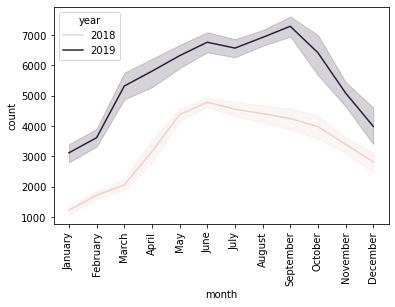

In [25]:
sns.lineplot(x='month', y='count',hue='year', data=rental);
plt.xticks(rotation=90)
plt.show()

### Inference:
1. We see a significant rise in the number of bike rents in the year 2019 

#### Inferences


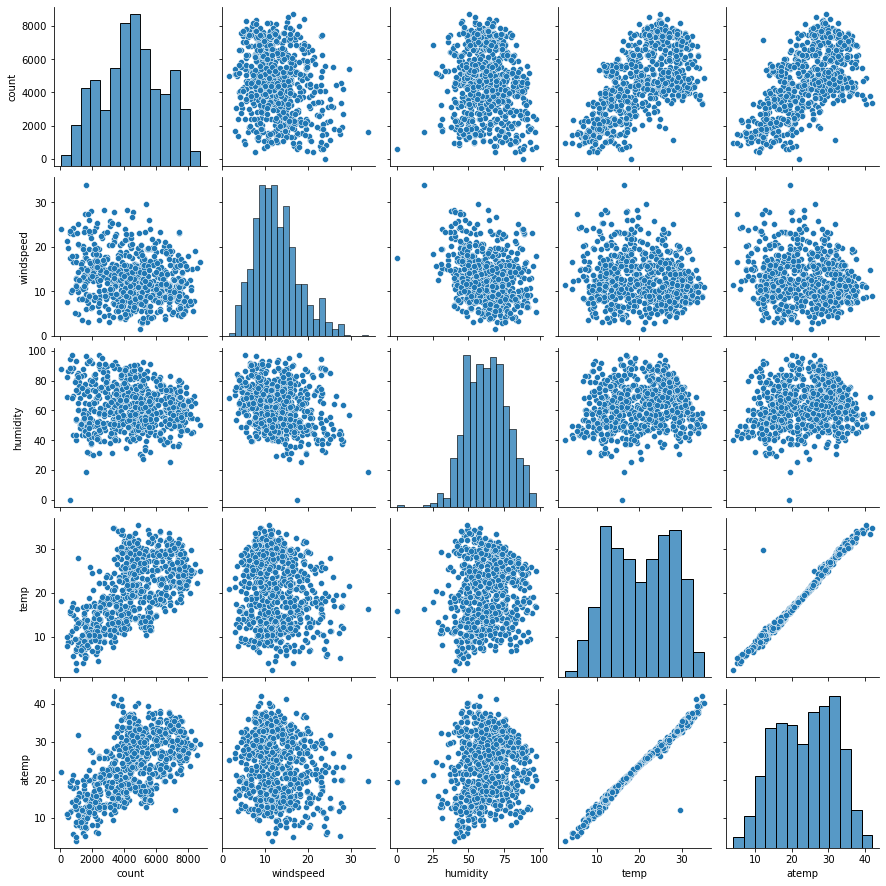

In [26]:
## plotting a pairplot of all the numerical data
pair_plot_columns = ['count','windspeed','humidity','temp','atemp']
sns.pairplot(rental[pair_plot_columns])
plt.show()

In [27]:
##find the correaltion between each varaible
rental.corr()

,year,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count
year,1.000000,0.008195,-0.011852,0.048789,0.047215,-0.112547,-0.011624,0.250502,0.596911,0.569728
holiday,0.008195,1.000000,-0.257009,-0.028764,-0.032703,-0.015662,0.006257,0.054055,-0.109142,-0.068764
workingday,-0.011852,-0.257009,1.000000,0.002044,0.010657,0.053770,-0.002453,-0.090369,0.005466,-0.027640
temp,0.048789,-0.028764,0.002044,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.047215,-0.032703,0.010657,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
humidity,-0.112547,-0.015662,0.053770,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.011624,0.006257,-0.002453,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.250502,0.054055,-0.090369,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.596911,-0.109142,0.005466,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
count,0.569728,-0.068764,-0.027640,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


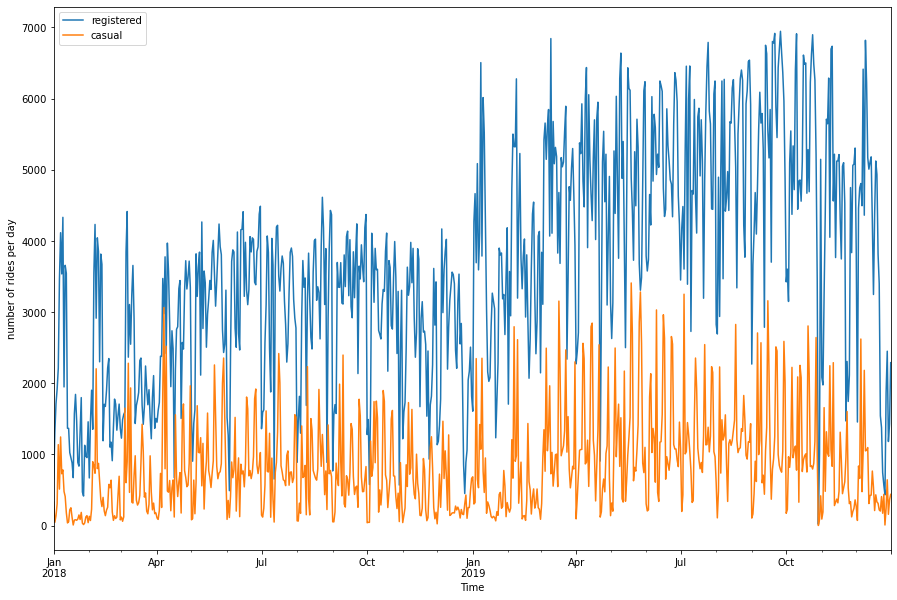

In [28]:
plot_data = rental[['dteday','registered','casual']]
ax = plot_data.groupby(by=['dteday']).sum().plot(figsize=(15,10))
ax.set_xlabel('Time')
ax.set_ylabel('number of rides per day')
plt.show()

## Inferences:- 
1. In any given month the number of registered user are more than casual users

# Data Preparation

#### According to the business objective cnt columns is identified to be our target variable and the rest columns are predcitor variable

In [29]:
## dropping few columns which are redundant for our analysis
rental.drop(columns=['dteday'],inplace=True)
## dropping casual and registered columns 
rental.drop(columns=['casual','registered'],inplace=True)
###dropping atemp column 
rental.drop(columns=['atemp'],inplace=True)

In [30]:
rental.columns

Index(['season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'humidity', 'windspeed', 'count'],
      dtype='object')

#  Dummy Creation

In [32]:
season = pd.get_dummies(rental['season'],drop_first=True)
season

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
725,1,0,0
726,1,0,0
727,1,0,0
728,1,0,0


We can drop the `fall` column, as it can be identified with just the last three columns where — 
- `100` will correspond to `spring`
- `010` will correspond to `summer`
- `001` will correspond to `winter`
- `000` will correspond to `fall`

In [33]:
##joing the two table using concat function
rental  = pd.concat([rental,season],axis=1)

In [34]:
#dropping the season column
rental.drop(columns=['season'],inplace=True)

In [35]:
rental.head()

,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count,spring,summer,winter
0,2018,January,0,Monday,1,Cloudy,14.110847,80.5833,10.749882,985,1,0,0
1,2018,January,0,Tuesday,1,Cloudy,14.902598,69.6087,16.652113,801,1,0,0
2,2018,January,0,Wednesday,1,Clear,8.050924,43.7273,16.636703,1349,1,0,0
3,2018,January,0,Thursday,1,Clear,8.200000,59.0435,10.739832,1562,1,0,0
4,2018,January,0,Friday,1,Clear,9.305237,43.6957,12.522300,1600,1,0,0


In [36]:
#creating dummy varaible for the weathersit column
weather =  pd.get_dummies(rental['weathersit'],drop_first=True)

We can drop the `clear` column, as it can be identified with just the last two columns where — 
- `10` will correspond to `cloudy`
- `01` will correspond to `light_rain`
- `00` will correspond to `clear`

In [37]:
rental = pd.concat([rental,weather],axis=1)

In [38]:
rental.drop(columns=['weathersit'],inplace=True)

In [39]:
rental.head()

,year,month,holiday,weekday,workingday,temp,humidity,windspeed,count,spring,summer,winter,Cloudy,Light_Rain
0,2018,January,0,Monday,1,14.110847,80.5833,10.749882,985,1,0,0,1,0
1,2018,January,0,Tuesday,1,14.902598,69.6087,16.652113,801,1,0,0,1,0
2,2018,January,0,Wednesday,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0
3,2018,January,0,Thursday,1,8.200000,59.0435,10.739832,1562,1,0,0,0,0
4,2018,January,0,Friday,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0


In [40]:
#creating dummy varaible for the year column
year =  pd.get_dummies(rental['year'],drop_first=True)
rental = pd.concat([rental,year],axis =1 )
rental.drop(columns=['year'],inplace=True)
rental.rename(columns={2019:'year'},inplace=True) #renaming the column

We can drop the `2018` column, as it can be identified with just the last columns where — 
- `00` will correspond to `2018`
- `01` will correspond to `2019`

In [41]:
#creating dummy varaible for the month column
month =  pd.get_dummies(rental['month'],drop_first=True)
rental = pd.concat([rental,month],axis =1 )
rental.drop(columns=['month'],inplace=True)

In [42]:
#creating dummy varaible for the weedkday column
day =  pd.get_dummies(rental['weekday'],drop_first=True)
rental = pd.concat([rental,day],axis =1 )
rental.drop(columns=['weekday'],inplace=True)

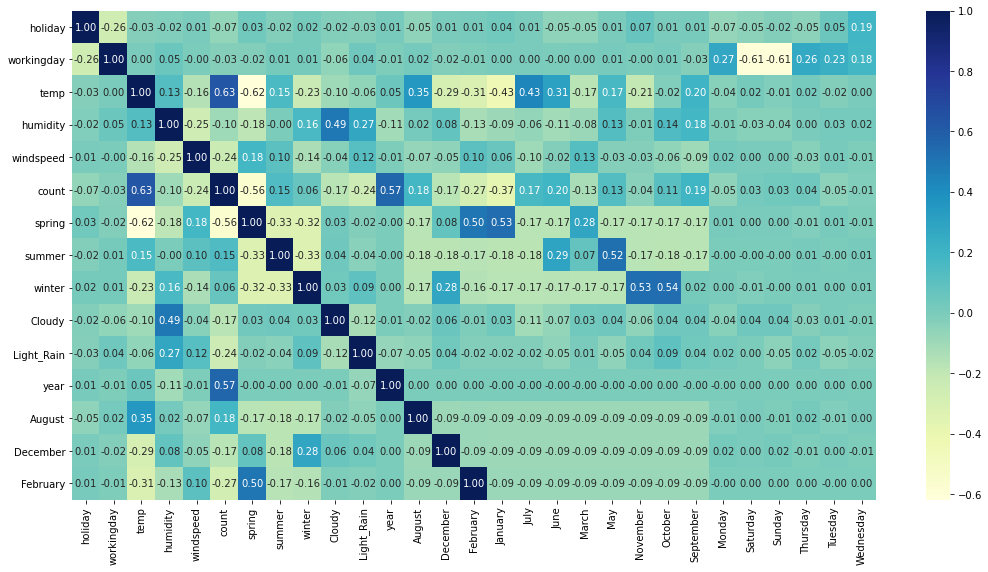

In [43]:
##find the top 15 correaltion between each varaible

plt.figure(figsize=(18,9))
sns.heatmap(rental.corr()[:15],annot=True,cmap='YlGnBu',fmt='.2f')
plt.show()

### Inference:
1. Temperature and year has higher correaltion with the target variable
2. January and February has the highest negative correaltion with the target variable

## Splitting into Training and Testing Set

In [44]:
#importing libraries and splitting the dataset
from sklearn.model_selection import train_test_split
df_train , df_test = train_test_split(rental,train_size=0.7,random_state=100)

### Rescaling the features


In [45]:
## importing the minmax scaler 
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()


num_vars =  ['temp','humidity','windspeed','count']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [46]:
df_train.head()

,holiday,workingday,temp,humidity,windspeed,count,spring,summer,winter,Cloudy,...,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
576,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
426,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
728,0,1,0.245101,0.498067,0.663106,0.204096,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
482,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
111,0,0,0.345824,0.751824,0.380981,0.191095,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0


In [47]:
###chossing our target variable and other predictor varaibels
y_train = df_train.pop('count')
X_train = df_train

In [48]:
#finding the shape of train sets
print(y_train.shape)
print(X_train.shape)

(510,)
(510, 28)


# Building a linear model

#### Approcach :-  I would be using a combaination of automated(RFE) + manual selection for the best Feature selection

In [49]:
# Importing RFE and LinearRegression libraries
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [50]:
#rfe using 10 predictor variables
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,10) 
rfe = rfe.fit(X_train, y_train)

In [51]:
#finding the list of highly correlated and least correlated
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('holiday', True, 1),
 ('workingday', False, 8),
 ('temp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('spring', False, 2),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Cloudy', False, 3),
 ('Light_Rain', True, 1),
 ('year', True, 1),
 ('August', False, 14),
 ('December', False, 6),
 ('February', False, 7),
 ('January', False, 4),
 ('July', True, 1),
 ('June', False, 16),
 ('March', False, 19),
 ('May', False, 13),
 ('November', False, 5),
 ('October', False, 17),
 ('September', True, 1),
 ('Monday', False, 12),
 ('Saturday', False, 9),
 ('Sunday', False, 10),
 ('Thursday', False, 18),
 ('Tuesday', False, 11),
 ('Wednesday', False, 15)]

In [52]:
#highly correlated variables are
col = X_train.columns[rfe.support_]
col

Index(['holiday', 'temp', 'humidity', 'windspeed', 'summer', 'winter',
       'Light_Rain', 'year', 'July', 'September'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [53]:
# Creating dataframe with RFE selected variables
X_train_rfe1 = X_train[col]

In [54]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe1 = sm.add_constant(X_train_rfe1)

lm1 = sm.OLS(y_train,X_train_rfe1).fit()   # Running the  first linear model

lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     247.6
Date:                Tue, 08 Jun 2021   Prob (F-statistic):          2.79e-186
Time:                        09:16:20   Log-Likelihood:                 494.18
No. Observations:                 510   AIC:                            -966.4
Df Residuals:                     499   BIC:                            -919.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2682      0.026     10.292      0.000       0.217       0.319
holiday       -0.0930      0.026     -3.543      0.000      -0.145      -0.041
temp           0.6200      0.023     27.492      0.000       0.576       0.664
humidity      -0.2868      0.032     -9.045      0.000      -0.349      -0.224
windspeed     -0.2059      0.026     -7.889      0.000      -0.257      -0.155
summer         0.0800      0.011      7.281      0.000       0.058       0.102
winter         0.1390      0.011     12.903      0.000       0.118       0.160
Light_Rain    -0.1914      0.026     -7.470      0.000      -0.242      -0.141
year           0.2259      0.008     27.118      0.000       0.210       0.242
July          -0.0482      0.018     -2.606      0.009      -0.085      -0.012
September      0.0944      0.016      5.724      0.000       0.062       0.127
==============================================================================
Omnibus:                       53.056   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.833
Skew:                          -0.655   Prob(JB):                     6.94e-21
Kurtosis:                       4.629   Cond. No.                         15.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
#dropping constant column for our vif analysis
X_train_rfe1.drop(columns=['const'],axis=1,inplace=True)


In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor #importing vif

#caluclating the vif of the top 10 features
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,humidity,10.29
1,temp,9.29
3,windspeed,3.54
7,year,2.02
4,summer,1.76
5,winter,1.68
8,July,1.55
9,September,1.29
6,Light_Rain,1.09
0,holiday,1.04


### Inference:
1. The vif value for humidity is higher than the considered value for vif which is 5.

In [57]:
## Dropping humidity column value as it has high vif value
X_train_rfe2 = X_train_rfe1.drop(columns=['humidity'],axis=1)


In [58]:
#adding constant
X_train_rfe2 = sm.add_constant(X_train_rfe2) 
# Running the second linear model
lm2 = sm.OLS(y_train,X_train_rfe2).fit() 
print(lm2.summary())


                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     229.0
Date:                Tue, 08 Jun 2021   Prob (F-statistic):          4.42e-171
Time:                        09:18:56   Log-Likelihood:                 455.47
No. Observations:                 510   AIC:                            -890.9
Df Residuals:                     500   BIC:                            -848.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0840      0.018      4.794      0.0

### Inferences :- 
1. The p-value for July is higher than the significance value which is 0.05. It should be drop as it is insignificant

In [59]:
X_train_rfe2.drop(columns=['const'],axis=1,inplace=True)


vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,4.96
2,windspeed,3.01
6,year,2.00
3,summer,1.75
7,July,1.51
4,winter,1.43
8,September,1.28
5,Light_Rain,1.06
0,holiday,1.03


In [61]:
#dropping the feature july 
X_train_rfe3 = X_train_rfe2.drop(columns=['July'],axis=1)

In [62]:
#buliding our 3rd model
X_train_rfe3 = sm.add_constant(X_train_rfe3)
lm3 = sm.OLS(y_train,X_train_rfe3).fit() 
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     256.6
Date:                Tue, 08 Jun 2021   Prob (F-statistic):          9.22e-172
Time:                        09:19:48   Log-Likelihood:                 454.20
No. Observations:                 510   AIC:                            -890.4
Df Residuals:                     501   BIC:                            -852.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0875      0.017      5.029      0.0

In [63]:
X_train_rfe3.drop(columns=['const'],axis=1,inplace=True) #dropping constant

#crating the table for vif of the features
vif = pd.DataFrame()
vif['Features'] = X_train_rfe3.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe3.values, i) for i in range(X_train_rfe3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,3.63
2,windspeed,2.97
6,year,2.00
3,summer,1.55
4,winter,1.34
7,September,1.20
5,Light_Rain,1.06
0,holiday,1.03


### Inference:-  
1. All the features has p-values than 0.05 and VIF values less than 5. So its good to predict our test data on this model.
2. The R-squared and adjusted R-squared have values 0.804 and .801. These values are also pretty good

## Residual  Analysis


In [64]:
#adding constant to our model
X_train_rfe3 = sm.add_constant(X_train_rfe3)


In [65]:
#predicting our y_train on our model
y_train_pred = lm3.predict(X_train_rfe3)
y_train_pred

576    0.745645
426    0.535189
728    0.363765
482    0.599516
111    0.309756
         ...   
578    0.784657
53     0.186455
350    0.291815
79     0.354484
520    0.690854
Length: 510, dtype: float64

Text(0.5, 0, 'Errors')

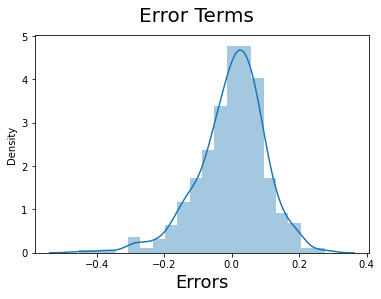

In [66]:
#plotting the residual 
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)               
plt.xlabel('Errors', fontsize = 18)   

### Inference:
1. The residual term are distributed normally and it satisfies our assumption of building our linear model

# Making Predictions


### Applyting Scaling on the test set

In [67]:
df_test

,holiday,workingday,temp,humidity,windspeed,count,spring,summer,winter,Cloudy,...,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
184,1,0,29.793347,63.7917,5.459106,6043,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
535,0,1,32.082500,59.2083,7.625404,6211,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,19.270000,81.2917,13.250121,2659,0,0,1,1,...,0,0,1,0,0,1,0,0,0,0
221,0,1,31.433347,42.4167,13.417286,4780,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,29.315000,30.5000,19.583229,4968,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,0,1,19.509153,73.3750,11.666643,6606,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
127,0,1,21.661653,63.1667,5.000712,4333,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
640,0,1,26.957500,79.3750,4.458569,7572,0,0,1,1,...,0,0,1,0,0,0,0,1,0,0
72,0,1,13.333897,49.6957,9.174042,2046,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [68]:
#using transform on our test model
num_vars=['temp', 'humidity','windspeed','count']

df_test[num_vars]= scaler.transform(df_test[num_vars])

In [69]:
## Dividing into X_test and y_test
y_test = df_test.pop('count')
X_test = df_test

In [70]:
X_train_rfe3.drop(columns=['const'],inplace=True)#dropping const

In [71]:
X_train_rfe3

,holiday,temp,windspeed,summer,winter,Light_Rain,year,September
576,0,0.815169,0.264686,0,0,0,1,0
426,0,0.442393,0.255342,0,0,0,1,0
728,0,0.245101,0.663106,0,0,0,1,0
482,0,0.395666,0.188475,1,0,0,1,0
111,0,0.345824,0.380981,1,0,0,0,0
...,...,...,...,...,...,...,...,...
578,0,0.863973,0.187140,0,0,0,1,0
53,0,0.202618,0.111379,0,0,0,0,0
350,0,0.248216,0.431816,0,1,0,0,0
79,0,0.462664,0.529881,1,0,0,0,0


In [72]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_rfe3.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

# Making predictions
y_pred = lm3.predict(X_test_new)
y_pred

184    0.461238
535    0.891909
299    0.455879
221    0.539079
152    0.554866
         ...   
702    0.700835
127    0.490771
640    0.863105
72     0.246330
653    0.692994
Length: 220, dtype: float64

## Model Evaluation

Text(0, 0.5, 'y_pred')

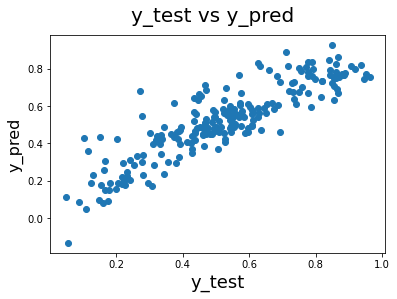

In [69]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [70]:
#calculating the r2 for the test data
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7720731949554799


The equation of the best fitted line is:

 count =  -0.0867 * holiday + 0.5682 * temp + -0.1455 * windspeed + 0.0812 * summer + 0.1261*winter + -0.2535 * Light_Rain + 0.2334 * year + 0.0895 * September 